In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
 #sklearn
from sklearn.model_selection  import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from math import sqrt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:

path = '/content/Maternal Health Risk Data Set.csv'
#df = pd.read_pickle(path)
df = pd.read_csv(path)
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]

In [3]:
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']


In [4]:
# Value counts for the RiskLevel column
print(df['RiskLevel'].value_counts())


RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


In [5]:
import pandas as pd

# Given class distribution
class_distribution = {'low risk': 406, 'mid risk': 336, 'high risk': 272}

# Convert to DataFrame
df_class_distribution = pd.DataFrame(list(class_distribution.items()), columns=['RiskLevel', 'Count'])

# Calculate the proportion
df_class_distribution['Proportion'] = df_class_distribution['Count'] / df_class_distribution['Count'].sum()

print(df_class_distribution)


   RiskLevel  Count  Proportion
0   low risk    406    0.400394
1   mid risk    336    0.331361
2  high risk    272    0.268245


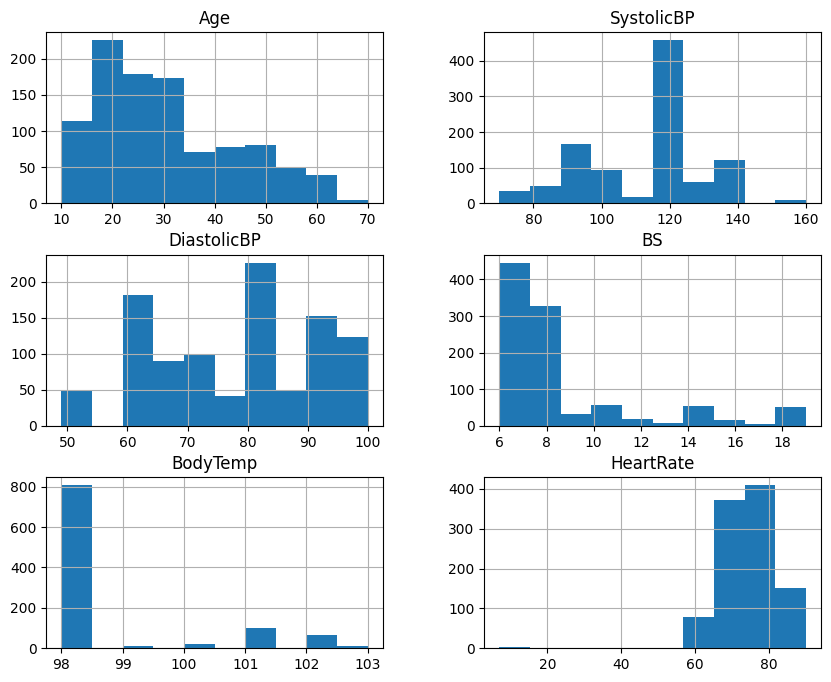

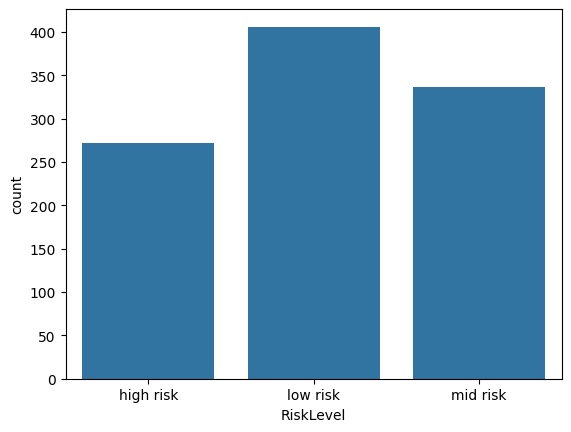

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
df.hist(figsize=(10, 8))
plt.show()

# Plot count plot for the categorical feature
sns.countplot(x='RiskLevel', data=df)
plt.show()


In [7]:
#Miss Valuse
df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


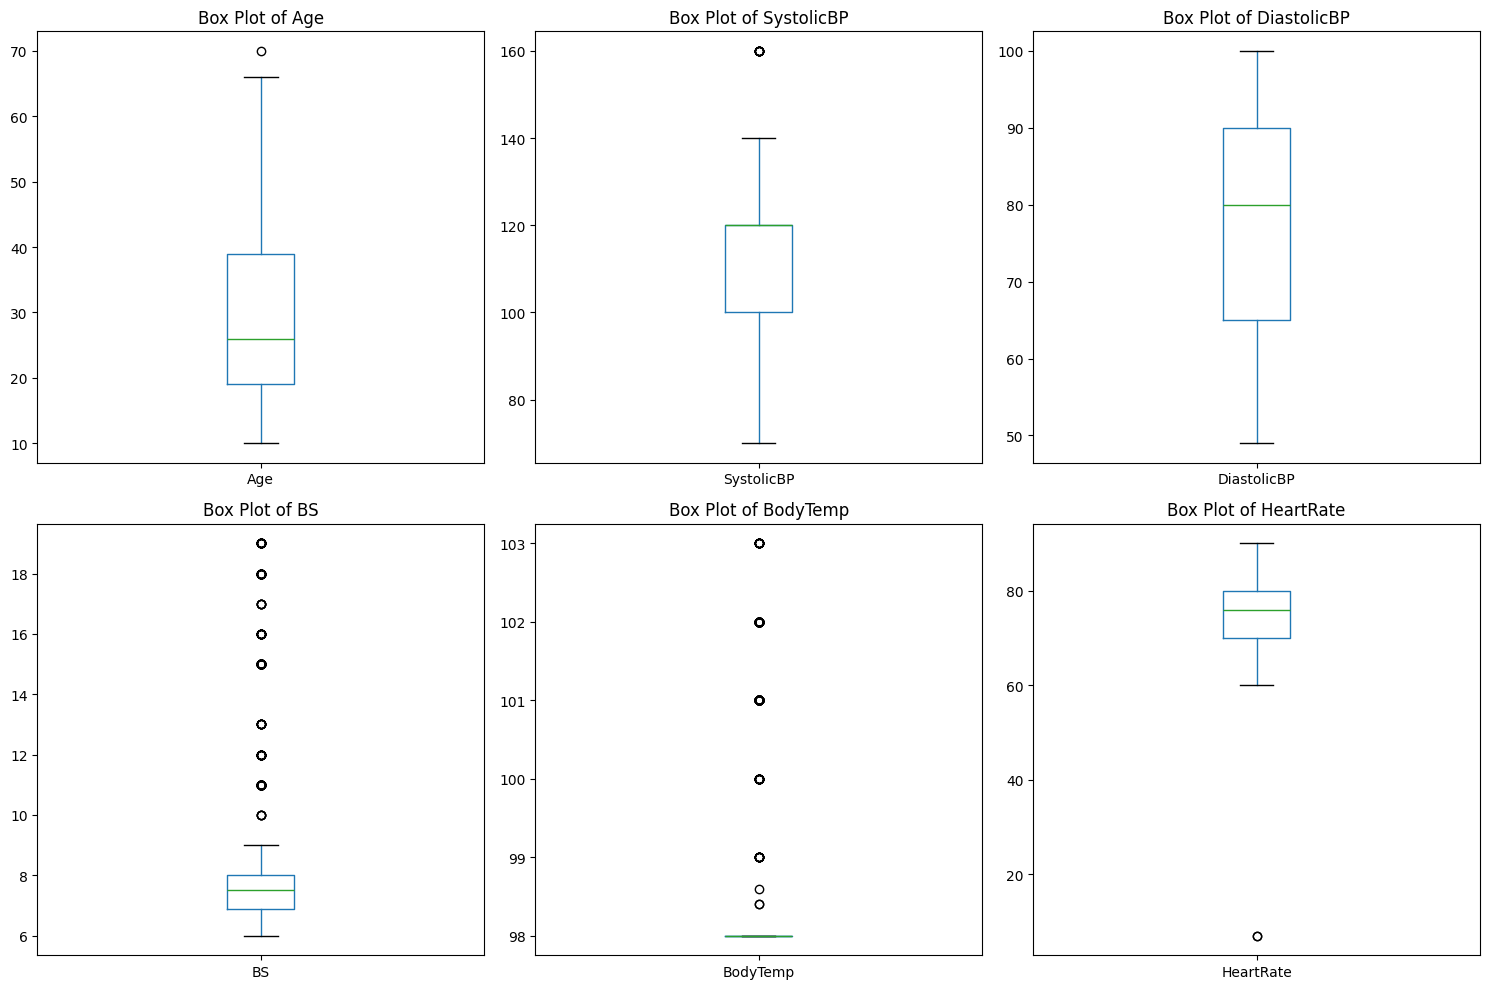

In [14]:
import matplotlib.pyplot as plt

# Extract numerical features
numerical_features = df.drop('RiskLevel', axis=1).select_dtypes(include=['int64', 'float64']).columns

# Create box plots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    df.boxplot(column=[feature])
    plt.title(f'Box Plot of {feature}')
    plt.grid(False)

plt.tight_layout()
plt.show()


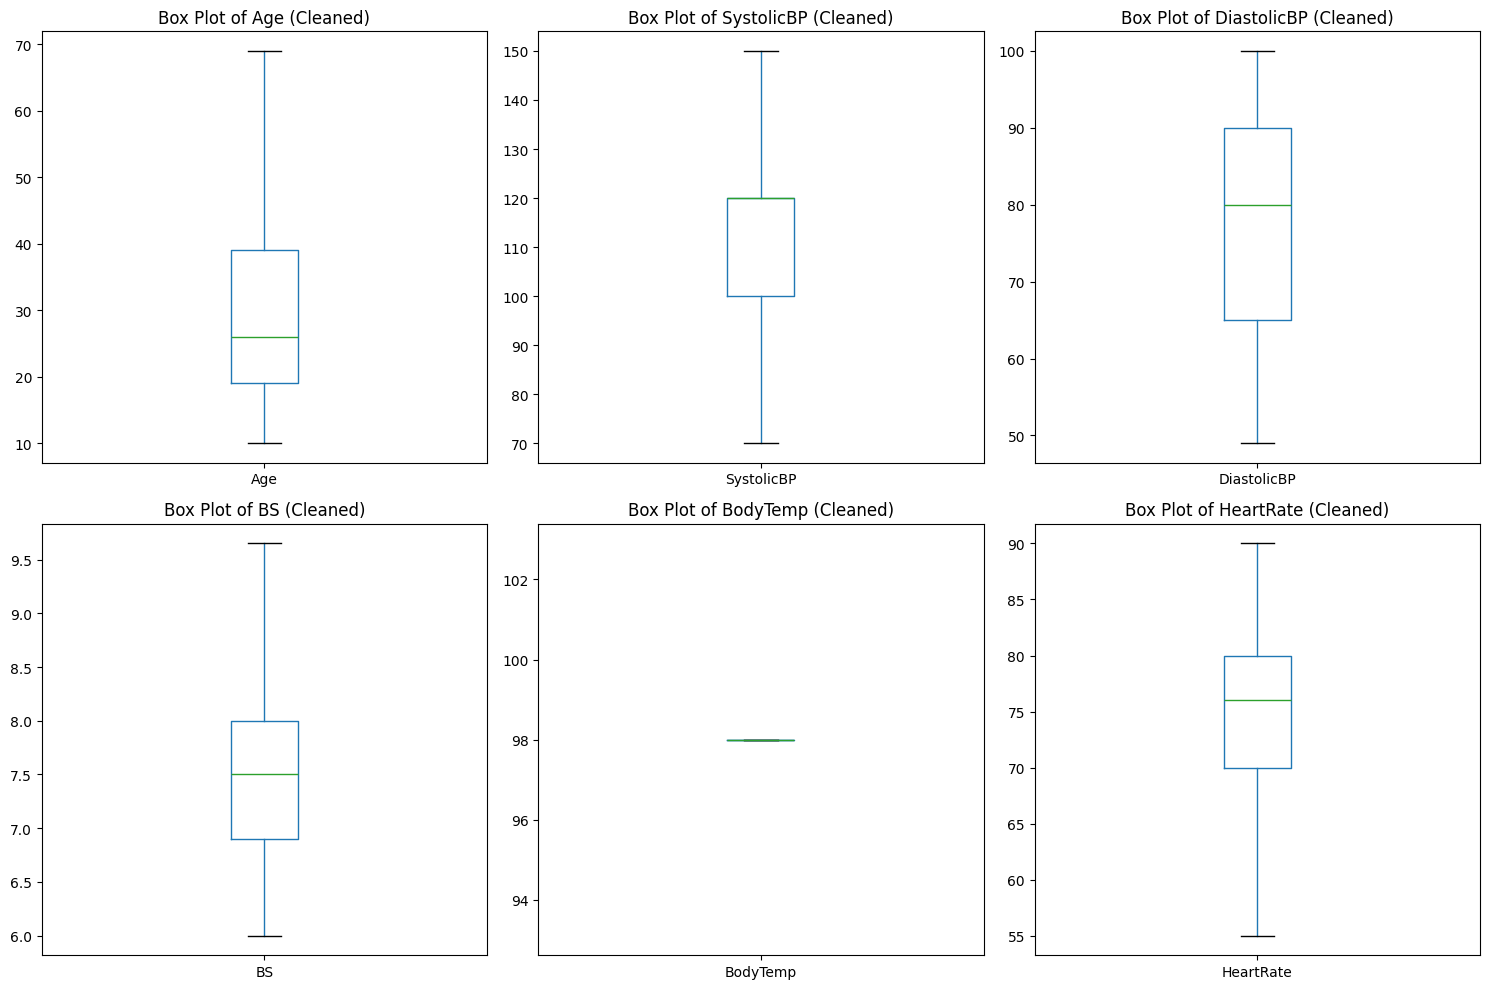

In [15]:
# Function to handle outliers using the IQR method
def handle_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping outliers
        df[feature] = df[feature].apply(
            lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
        )
    return df

# Apply the function to the numerical features
df_cleaned = handle_outliers(df, numerical_features)

# Verify the result with new box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    df_cleaned.boxplot(column=[feature])
    plt.title(f'Box Plot of {feature} (Cleaned)')
    plt.grid(False)

plt.tight_layout()
plt.show()


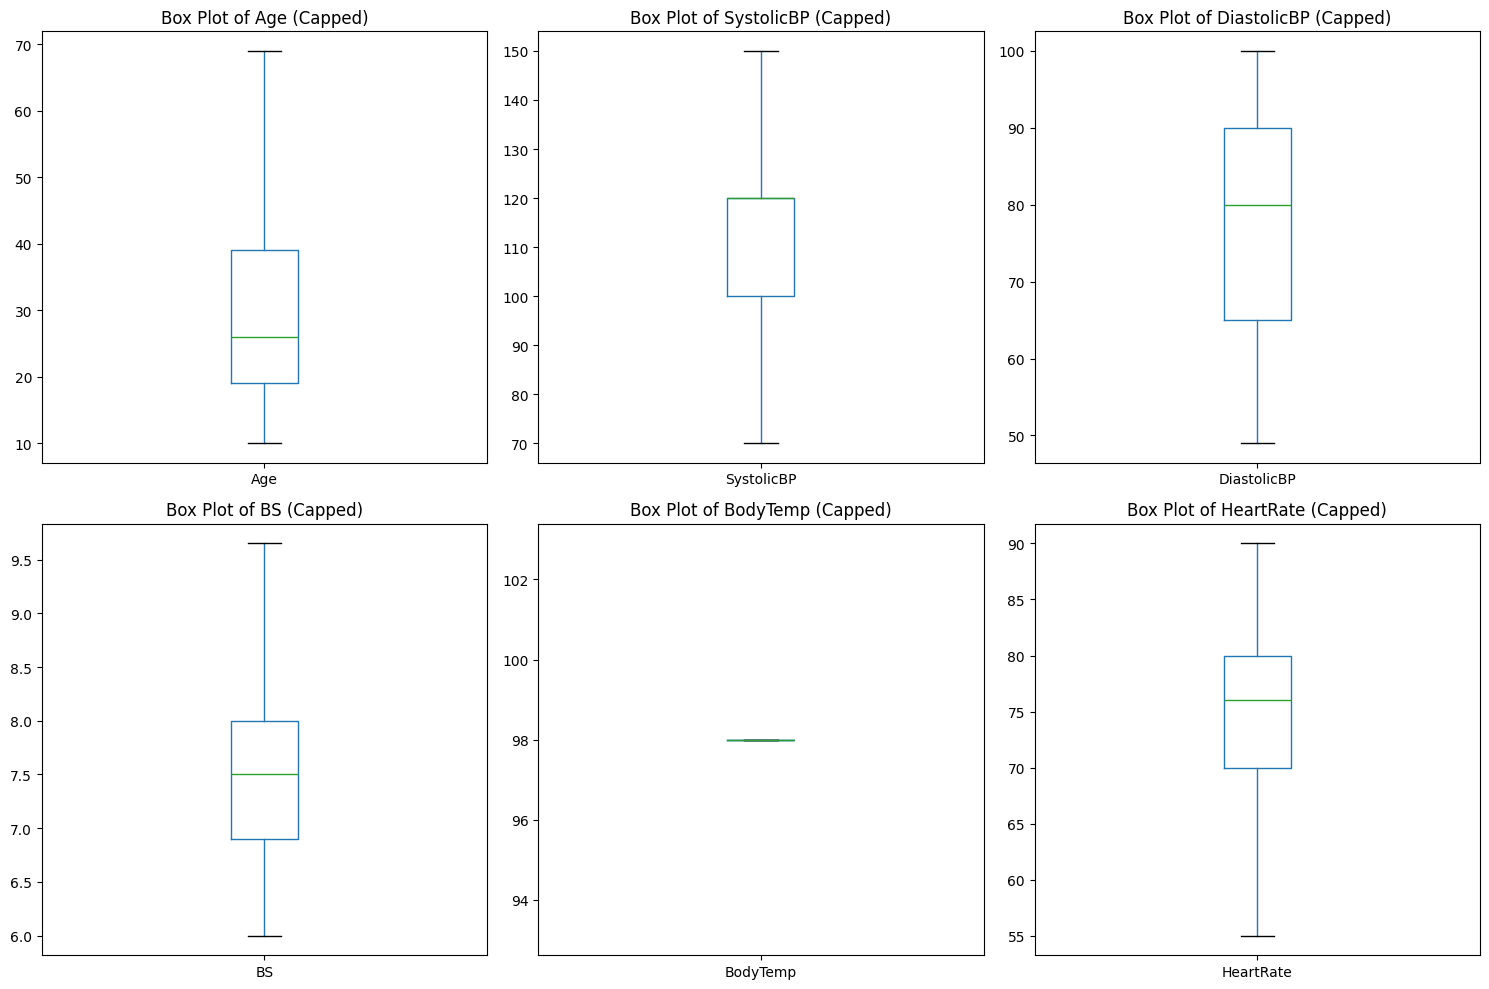

In [16]:
# Function to cap outliers using the IQR method
def cap_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[feature].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Capping the outliers
        df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply the function to numerical features
df_capped = cap_outliers(df, numerical_features)

# Verify the capped data with new box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    df_capped.boxplot(column=[feature])
    plt.title(f'Box Plot of {feature} (Capped)')
    plt.grid(False)

plt.tight_layout()
plt.show()


In [8]:
# Split the resampled and scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic samples for the minority class.
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Convert back to DataFrame to visualize the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['RiskLevel'])], axis=1)
print(df_resampled['RiskLevel'].value_counts())





RiskLevel
mid risk     326
high risk    326
low risk     326
Name: count, dtype: int64


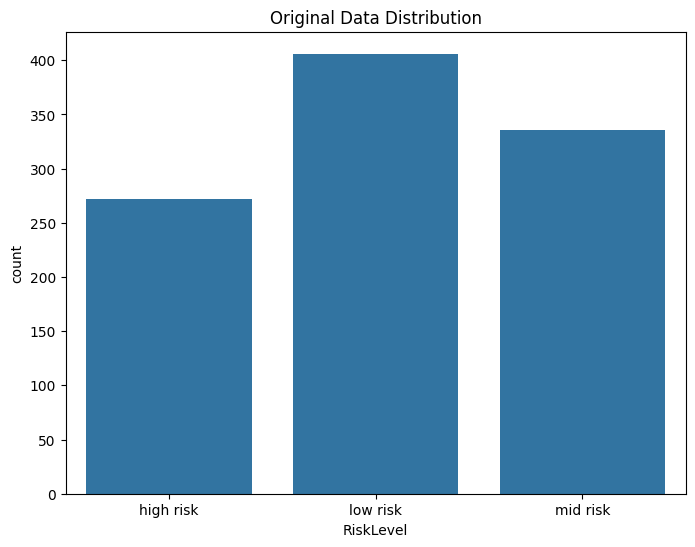

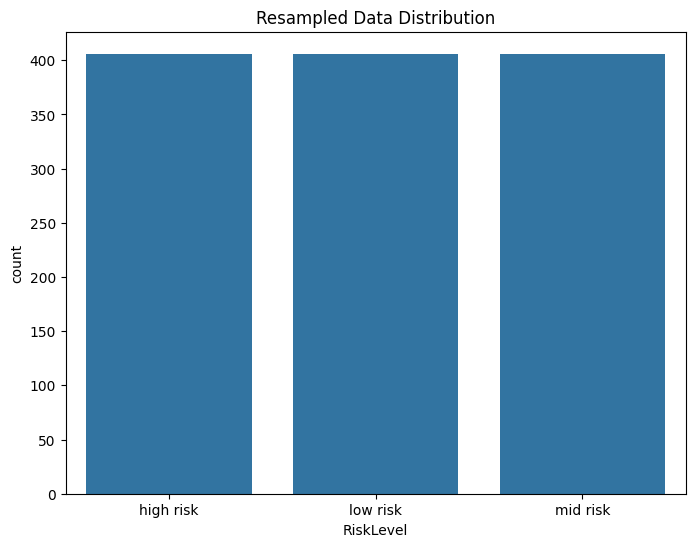

In [9]:



#Undersampling with RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

# Apply RandomUnderSampler to the data
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# Convert back to DataFrame to visualize the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['RiskLevel'])], axis=1)
print(df_resampled['RiskLevel'].value_counts())


RiskLevel
high risk    225
low risk     225
mid risk     225
Name: count, dtype: int64


In [11]:

from imblearn.combine import SMOTEENN

# Initialize SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN to the data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Convert back to DataFrame to visualize the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['RiskLevel'])], axis=1)
print(df_resampled['RiskLevel'].value_counts())


RiskLevel
high risk    224
low risk     176
mid risk     148
Name: count, dtype: int64


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Convert back to DataFrame to visualize the resampled and scaled data
df_resampled_scaled = pd.DataFrame(X_resampled_scaled, columns=X.columns)
df_resampled_scaled['RiskLevel'] = y_resampled

print(df_resampled_scaled.head())
print(df_resampled_scaled['RiskLevel'].value_counts())

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  RiskLevel
0 -0.400458    0.841212     0.189895  1.731790  -0.51249   1.422736  high risk
1  0.348671    1.377004     0.901780  1.154853  -0.51249  -0.566950  high risk
2 -0.100806   -1.301958    -0.521991 -0.287490   0.92263   0.676604  high risk
3 -0.025894    1.377004     0.545838 -0.575959  -0.51249  -0.566950  high risk
4  0.348671    0.305419    -1.233877 -0.835580  -0.51249   0.179182   low risk
RiskLevel
high risk    406
low risk     406
mid risk     406
Name: count, dtype: int64


In [ ]:
# Split the resampled and scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.20, random_state=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

   high risk       0.99      0.93      0.96        73
    low risk       0.84      0.80      0.82        87
    mid risk       0.77      0.85      0.81        84

    accuracy                           0.86       244
   macro avg       0.87      0.86      0.86       244
weighted avg       0.86      0.86      0.86       244

Accuracy Score:
0.8565573770491803


In [ ]:
'''x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:


# Initialize the Random Forest Classifier
#rf_clf = RandomForestClassifier()
rf_clf = DecisionTreeClassifier(random_state=1)

# Train the model
rf_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_matrix_values = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(confusion_matrix_values)

Accuracy: 0.8669950738916257
Classification Report:
              precision    recall  f1-score   support

   high risk       0.88      0.91      0.89        54
    low risk       0.92      0.84      0.88        85
    mid risk       0.80      0.88      0.84        64

    accuracy                           0.87       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.87      0.87       203

Confusion Matrix:
[[49  0  5]
 [ 5 71  9]
 [ 2  6 56]]


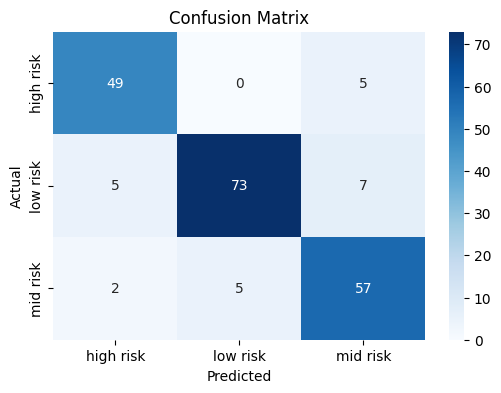

In [ ]:
# Visualize the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_values, annot=True, fmt='d', cmap='Blues', xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:


# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier()
#rf_clf = DecisionTreeClassifier(random_state=1)

# Train the model
rf_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_matrix_values = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(confusion_matrix_values)

Accuracy: 0.8916256157635468
Classification Report:
              precision    recall  f1-score   support

   high risk       0.88      0.91      0.89        54
    low risk       0.95      0.87      0.91        85
    mid risk       0.84      0.91      0.87        64

    accuracy                           0.89       203
   macro avg       0.89      0.89      0.89       203
weighted avg       0.90      0.89      0.89       203

Confusion Matrix:
[[49  0  5]
 [ 5 74  6]
 [ 2  4 58]]


In [ ]:
# #Replace RiskLevel column values
# df['RiskLevel'] = df['RiskLevel'].replace({'low risk':'1', 'mid risk': '2', 'high risk': '3'})
# df.head()
# #df.RiskLevel.value_counts()